# 这里是 Markdown 单元格


In [1]:
import torch
import sys
print(sys.version)

print(torch.__version__)  # 检查 PyTorch 版本
print(torch.cuda.is_available())  # 是否检测到 GPU（应返回 True）
print(torch.cuda.get_device_name(0))  # 输出 GPU 设备名称
print(torch.version.cuda)  # 检查 PyTorch 绑定的 CUDA 版本
print(torch.backends.cudnn.enabled)  # 是否启用 cuDNN
print(torch.backends.cudnn.version())  # cuDNN 版本

3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:29:11) [MSC v.1935 64 bit (AMD64)]
2.5.1
True
NVIDIA GeForce RTX 4060 Laptop GPU
12.4
True
90100


In [ ]:
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Version: {torch.version.cuda}")
print(f"Is CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(
            f"  Memory Allocated: {torch.cuda.memory_allocated(i) / (1024 ** 2):.2f} MB")
        print(
            f"  Memory Cached: {torch.cuda.memory_reserved(i) / (1024 ** 2):.2f} MB")

PyTorch Version: 2.5.1
CUDA Version: 12.4
Is CUDA Available: True
Number of GPUs: 1
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB


# 两个神奇操作

! 以及 %% 使用


In [2]:
!nvidia-smi
!chcp 65001
!echo 中文
!time /t
!dir

Sun Mar  9 16:19:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8              2W /  120W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%%timeit
a = []
for i in range(10):
    a.append(i)

318 ns ± 3.46 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
%%time
a = []
for i in range(1000000):
    a.append(i)

CPU times: total: 46.9 ms
Wall time: 59.2 ms


: 

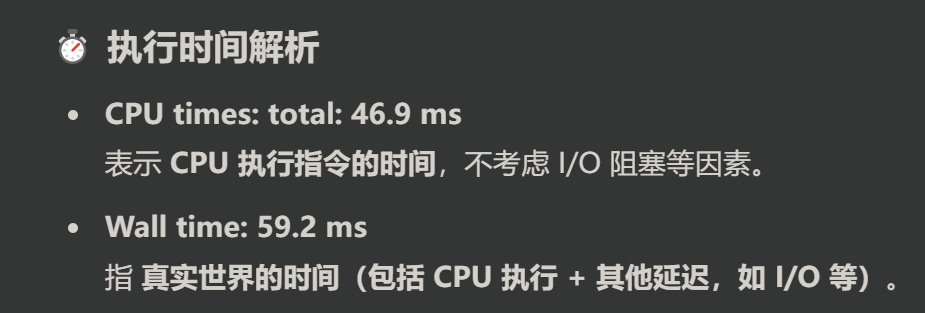


pdf 设置背景色


In [8]:
import fitz  # PyMuPDF
# 打开 PDF
pdf_path = "PyTorch实用教程1.pdf"
output_path = "PyTorch实用教程2.pdf"
doc = fitz.open(pdf_path)
# 归一化 RGB 颜色 (豆沙绿)
bg_color = (199 / 255, 237 / 255, 204 / 255)
for page in doc:
    rect = page.rect  # 获取页面大小
    page.draw_rect(rect, fill=bg_color, overlay=False)  # 设置背景色但不覆盖文字
# 保存新的 PDF
doc.save(output_path)
doc.close()